In [21]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
import skfuzzy as fuzz
from pyclustering.cluster.xmeans import xmeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from pyclustering.utils import distance_metric, type_metric
import seaborn as sns
from sklearn.manifold import TSNE
data= pd.read_csv('../DATASET/Hasil_Gabungan.csv')
featuress = [
    'Residential_2021', 'Industrial_2021', 'Business_2021', 'Social_2021', 'Gov_Office_2021', 
    'Pub_Street_2021', 'Total_2021', 'Residential_2022', 'Industrial_2022', 'Business_2022', 
    'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'Residential', 
    'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 
    'JP_2021', 'JP_2022', 'JP_2023', 'KP_2021', 'KP_2022', 'KP_2023'
]

dataS = data[featuress]
dataS['Provinsi'] = data['Province']

scaler = RobustScaler()
scaled_features = scaler.fit_transform(dataS[featuress])

In [22]:
dbscan = DBSCAN(eps=9, min_samples=16)
clusters = dbscan.fit_predict(scaled_features)
data['Cluster'] = clusters
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
clusters_modified = clusters.copy()
clusters_modified[clusters == -1] = num_clusters 

data['Cluster'] = clusters_modified

provinsi_cluster = data[['Province', 'Cluster']]
for cluster in set(clusters_modified):
    print(f"\nProvinsi yang masuk dalam Cluster {cluster}:")
    print(provinsi_cluster[provinsi_cluster['Cluster'] == cluster]['Province'].to_list())

num_clusters_modified = len(set(clusters_modified)) - (1 if -1 in clusters_modified else 0)
num_outliers_modified = list(clusters_modified).count(num_clusters)  

print(f"\nJumlah klaster yang ditemukan setelah modifikasi (termasuk outliers sebagai klaster): {num_clusters_modified}")
print(f"Jumlah outlier yang dianggap klaster baru: {num_outliers_modified}")

if num_clusters_modified > 1:
    sil_score = silhouette_score(scaled_features, clusters_modified)
    print(f"Silhouette Score: {sil_score}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya ada 1 klaster atau semua data dianggap outliers.")



Provinsi yang masuk dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']

Provinsi yang masuk dalam Cluster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']

Jumlah klaster yang ditemukan setelah modifikasi (termasuk outliers sebagai klaster): 2
Jumlah outlier yang dianggap klaster baru: 5
Silhouette Score: 0.8098681704159247


In [23]:
kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans.fit(scaled_features) 
dataS['Cluster'] = kmeans.labels_

sil_score = silhouette_score(scaled_features, kmeans.labels_)


for cluster_id in np.unique(kmeans.labels_):
    print(f"Provinsi dalam Klaster {cluster_id}:")
    print(dataS[dataS['Cluster'] == cluster_id]['Provinsi'].tolist())

sil_score

Provinsi dalam Klaster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']
Provinsi dalam Klaster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']


np.float64(0.8098681704159247)

In [24]:
np.random.seed(42)
initial_medoids = np.random.choice(range(scaled_features.shape[0]), size=3, replace=False).tolist()  

kmedoids_model = kmedoids(scaled_features, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))
kmedoids_model.process()

clusters = kmedoids_model.get_clusters()
centers = kmedoids_model.get_medoids()


cluster_provinces = {}
provinces = data['Province'].tolist() 

for cluster_idx, cluster in enumerate(clusters):
    cluster_provinces[cluster_idx] = [provinces[i] for i in cluster]

for cluster_idx, provinces_in_cluster in cluster_provinces.items():
    print(f"Cluster {cluster_idx + 1}: {', '.join(provinces_in_cluster)}")

labels = np.zeros(len(scaled_features))  
for cluster_idx, cluster in enumerate(clusters):
    labels[cluster] = cluster_idx  

sil_score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {sil_score}")

Cluster 1: Aceh, Sumatera Utara, Sumatera Barat, Riau, Kep. Riau, Sumatera Selatan, Jambi, Bengkulu, Kep. Bangka Belitung, Lampung, Kalimantan Barat, Kalimantan Selatan, Kalimantan Tengah, Sulawesi Utara, Gorontalo, Sulawesi Tengah, Sulawesi Selatan, Sulawesi Tenggara, Sulawesi Barat, Maluku, Maluku Utara, Papua, Papua Barat, Bali, Nusa Tenggara Barat, Nusa Tenggara Timur, DI Yogyakarta, Kalimantan Timur, Kalimantan Utara
Cluster 2: DKI Jakarta
Cluster 3: Jawa Timur, Jawa Tengah, Jawa Barat, Banten
Silhouette Score: 0.8134610115525492


In [28]:
n_clusters = 3

cntr, u, _, _, _, _, _ = fuzz.cmeans(scaled_features.T, c=n_clusters, m=1.5, error=0.001, maxiter=100, init=None)

labels = np.argmax(u, axis=0)

cluster_provinces = {}
provinces = data['Province'].tolist()  

for cluster_idx in range(n_clusters):
    cluster_provinces[cluster_idx] = [provinces[i] for i in range(len(labels)) if labels[i] == cluster_idx]

for cluster_idx, provinces_in_cluster in cluster_provinces.items():
    print(f"Cluster {cluster_idx + 1}: {', '.join(provinces_in_cluster)}")

sil_score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {sil_score}")

Cluster 1: Aceh, Sumatera Utara, Sumatera Barat, Riau, Kep. Riau, Sumatera Selatan, Jambi, Bengkulu, Kep. Bangka Belitung, Lampung, Kalimantan Barat, Kalimantan Selatan, Kalimantan Tengah, Sulawesi Utara, Gorontalo, Sulawesi Tengah, Sulawesi Selatan, Sulawesi Tenggara, Sulawesi Barat, Maluku, Maluku Utara, Papua, Papua Barat, Bali, Nusa Tenggara Barat, Nusa Tenggara Timur, DI Yogyakarta, Kalimantan Timur, Kalimantan Utara
Cluster 2: Jawa Timur, Jawa Tengah, Jawa Barat, Banten
Cluster 3: DKI Jakarta
Silhouette Score: 0.8134610115525492


In [26]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) 
kmeans.fit(scaled_features)
initial_centers = kmeans.cluster_centers_

model = xmeans(scaled_features.tolist(), initial_centers=initial_centers.tolist(), kmax=10)
model.process()

clusters = model.get_clusters()
centers = model.get_centers()

cluster_provinces = {}
provinces = data['Province'].tolist()  

for cluster_idx, cluster in enumerate(clusters):
    cluster_provinces[cluster_idx] = [provinces[i] for i in cluster]

for cluster_idx, provinces_in_cluster in cluster_provinces.items():
    print(f"Cluster {cluster_idx + 1}: {', '.join(provinces_in_cluster)}")

labels = np.zeros(len(scaled_features))

for cluster_idx, cluster in enumerate(clusters):
    for i in cluster:
        labels[i] = cluster_idx  

sil_score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {sil_score}")

Cluster 1: Kep. Riau, Jambi, Bengkulu, Kep. Bangka Belitung, Kalimantan Tengah, Sulawesi Utara, Gorontalo, Sulawesi Tengah, Sulawesi Tenggara, Sulawesi Barat, Maluku, Maluku Utara, Papua, Papua Barat, Nusa Tenggara Timur, Kalimantan Utara
Cluster 2: Aceh, Sumatera Barat, Kalimantan Barat, Kalimantan Selatan, Nusa Tenggara Barat, DI Yogyakarta, Kalimantan Timur
Cluster 3: Riau, Sumatera Selatan, Lampung, Sulawesi Selatan, Bali
Cluster 4: Sumatera Utara
Cluster 5: Banten
Cluster 6: Jawa Timur, Jawa Tengah, Jawa Barat, DKI Jakarta
Silhouette Score: 0.2905074652991418


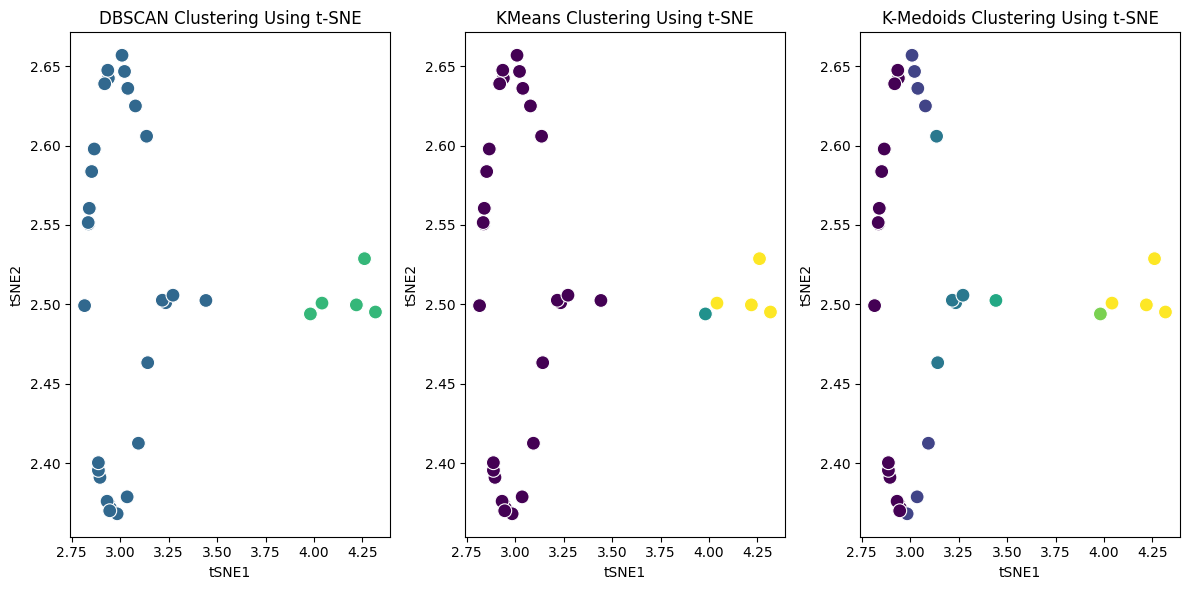

In [27]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_features)

df_tsne = pd.DataFrame(data=X_tsne, columns=['tSNE1', 'tSNE2'])
df_tsne['Provinsi'] = data['Province'].tolist()

df_tsne['DBSCAN_Cluster'] = clusters_modified
df_tsne['KMeans_Cluster'] = kmeans.labels_
df_tsne['KMedoids_Cluster'] = labels  
df_tsne['FCM_Cluster'] = labels  
df_tsne['XMeans_Cluster'] = labels  

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='DBSCAN_Cluster', palette='viridis', s=100, legend=None)
plt.title('DBSCAN Clustering Using t-SNE')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='KMeans_Cluster', palette='viridis', s=100, legend=None)
plt.title('KMeans Clustering Using t-SNE')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='KMedoids_Cluster', palette='viridis', s=100, legend=None)
plt.title('K-Medoids Clustering Using t-SNE')

plt.tight_layout()
plt.show()
